# Student Performance Regression

As a data analyst, I want to explore, clean, and build a regression model on the Student Performance dataset, so that I can predict student performance based on various academic and demographic factors.

imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re, random, os
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

1. Load and Explore the Dataset

In [13]:
df = pd.read_csv(r'C:\Users\bbuser\Desktop\DataScience-Brain-Bytes-1\Team_members\from_arwa\data\Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [18]:
df.shape

(10000, 6)

In [19]:
df.info() # Open the dataset and review its structure (rows, columns, and data types).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [21]:
df.describe() # Summarize numerical features (mean, median, standard deviation)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [25]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [24]:
df.duplicated().sum() # Check for duplicates and understand each feature.

np.int64(127)

In [ ]:
df_no_duplicates = df.drop_duplicates() # drop duplicates

In [27]:
df_no_duplicates.duplicated().sum() # just checking

np.int64(0)

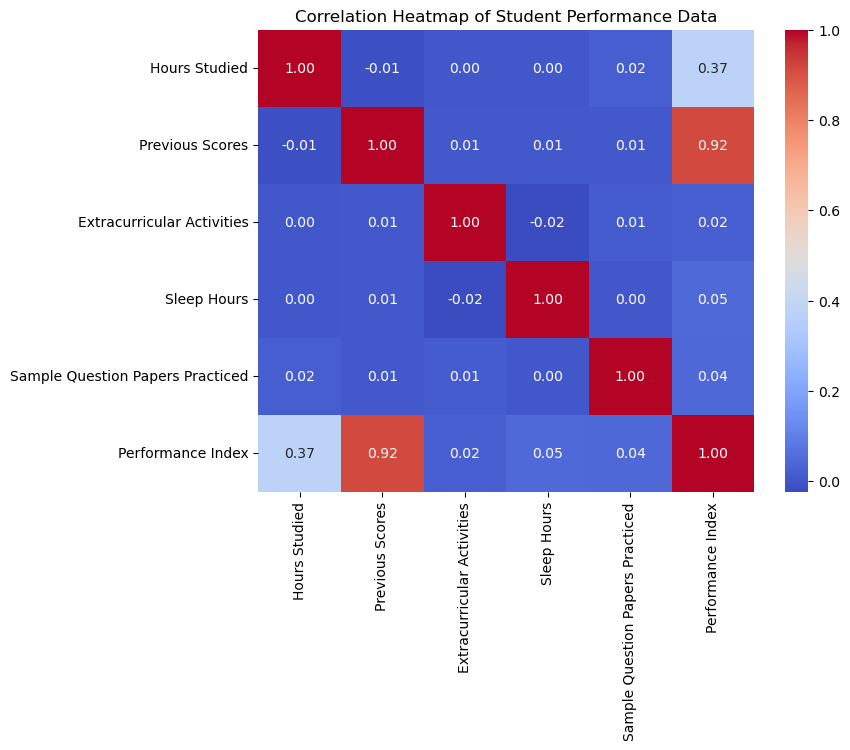

In [37]:
corr = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Student Performance Data")
plt.show()

2. Data Preprocessing

In [29]:
# Convert categorical variables into numerical representations.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [30]:
print("Unique values in Extracurricular Activities:")
print(df['Extracurricular Activities'].value_counts())

Unique values in Extracurricular Activities:
Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64


In [31]:
# If it's Yes/No , Convert categorical variables into numerical representations.
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Check the result
print(df['Extracurricular Activities'].value_counts()) 

Extracurricular Activities
0    5052
1    4948
Name: count, dtype: int64


In [32]:
# Target (y) and features (X)
target_col = "Performance Index"
X = df.drop(columns=[target_col])
y = df[target_col]

# Train/test split (80/20, reproducible)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 5) (2000, 5) (8000,) (2000,)


3. Build the Regression Model

In [33]:
model = LinearRegression()

model.fit(X_train, y_train)

coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

intercept = model.intercept_

print("Intercept:", intercept)
print(coefficients)

Intercept: -33.92194621555628
                            Feature  Coefficient
0                     Hours Studied     2.852484
1                   Previous Scores     1.016988
2        Extracurricular Activities     0.608617
3                       Sleep Hours     0.476941
4  Sample Question Papers Practiced     0.191831


4. Evaluate the Model

In [36]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   # root mean squared error
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 4.082628398521858
Root Mean Squared Error (RMSE): 2.0205515085050068
R-squared (R²): 0.9889832909573145
